The silhouette width is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It is a way to evaluate the quality of clustering results, indicating how well-separated and distinct the clusters are in a given dataset. Silhouette width values range from -1 to 1. So we can use silhoutte width to measure cluster separation performance between unscaled and scaled values.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score


iris = load_iris()
# Select petal width and length features
X = iris.data[:, 2:4]  

# Without Scaling
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)
silhouette_no_scaling = silhouette_score(X, cluster_labels)

# With Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
kmeans_scaled = KMeans(n_clusters=k, random_state=42)
cluster_labels_scaled = kmeans_scaled.fit_predict(X_scaled)
silhouette_scaling = silhouette_score(X_scaled, cluster_labels_scaled)

print("Silhouette Score without scaling:", silhouette_no_scaling)
print("Silhouette Score with scaling:", silhouette_scaling)


c:\Users\duygu\OneDrive\Documents\Foundations of Machine Learning Framework\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\duygu\OneDrive\Documents\Foundations of Machine Learning Framework\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score without scaling: 0.6604800085022658
Silhouette Score with scaling: 0.6744029948083164


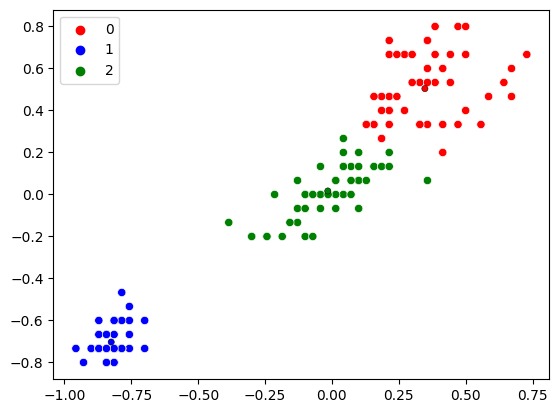

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


colors = ['red', 'blue', 'green']
ax = sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=cluster_labels_scaled, palette=colors)

means = np.vstack([X_scaled[cluster_labels_scaled == i].mean(axis=0) for i in range(3)])
ax = sns.scatterplot(x=means[:, 0], y=means[:, 1], hue=range(3), palette=colors, s=20, ec='black', legend=False, ax=ax)
plt.show()

There is a 1% improvement when you scale the features. All features should be in similar scales to establish a better model.

Draw elbow plot of different k values

c:\Users\duygu\OneDrive\Documents\Foundations of Machine Learning Framework\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\duygu\OneDrive\Documents\Foundations of Machine Learning Framework\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\duygu\OneDrive\Documents\Foundations of Machine Learning Framework\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\duygu\OneDrive\Documents\Fou

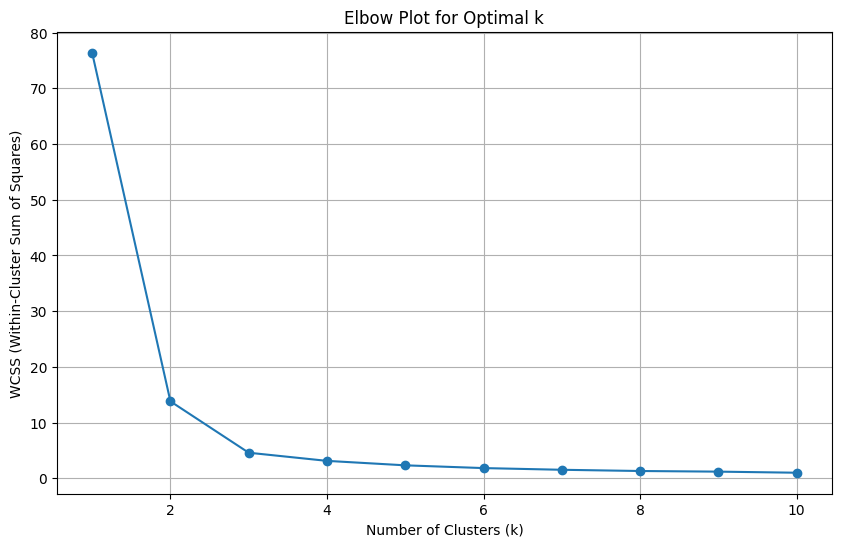

In [3]:
import numpy as np


# Calculate WCSS (within-cluster sum of squares) for different values of k
wcss = []
max_clusters = 10  # You can choose the maximum number of clusters to consider

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) 

# Plot the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Plot for Optimal k')
plt.grid(True)
plt.show()


When examining the graph, it becomes evident that there is a distinct point where the graph experiences a sharp change, forming an elbow-like bend. Beyond this point, the graph maintains a nearly constant, parallel trajectory along the X-axis. The value of K associated with this specific point represents the most suitable choice for the number of clusters, thus representing the optimal clustering solution. k = 3 is the optimal solution here.

Question 2

In [4]:
import pandas as pd
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
print(heart_df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR   
count  918.000000  918.000000   918.000000  918.000000  918.000000  \
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [6]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

Remove outliers of all numeric columns using zscore

In [7]:
def remove_outliers_zscore(df, column_name, threshold = 3):
    mean = df[column_name].mean()
    std = df[column_name].std()
    df['Z_score'] = (df[column_name] - mean) / std
    df_outliers_removed = df[abs(df['Z_score']) <= threshold]
    return df_outliers_removed.drop(columns='Z_score')

In [8]:
heart_df = remove_outliers_zscore(heart_df, 'Age')
heart_df = remove_outliers_zscore(heart_df, 'RestingBP')
heart_df = remove_outliers_zscore(heart_df, 'Cholesterol')
heart_df = remove_outliers_zscore(heart_df, 'MaxHR')
heart_df = remove_outliers_zscore(heart_df, 'Oldpeak')
heart_df.shape

(899, 12)

<Axes: >

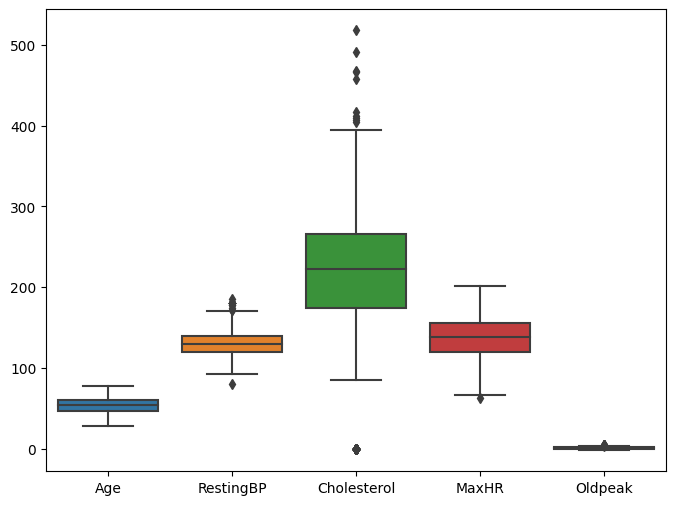

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(data=heart_df[['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

In [10]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
heart_df['ChestPainType'] = labelencoder.fit_transform(heart_df['ChestPainType'])
heart_df['RestingECG'] = labelencoder.fit_transform(heart_df['RestingECG'])
heart_df['ST_Slope'] = labelencoder.fit_transform(heart_df['ST_Slope'])
heart_df['ExerciseAngina'] = labelencoder.fit_transform(heart_df['ExerciseAngina'])
heart_df['Sex'] = labelencoder.fit_transform(heart_df['Sex'])

In [11]:
from sklearn.preprocessing import RobustScaler
rbs = RobustScaler()
heart_df[['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] = rbs.fit_transform(heart_df[['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

In [12]:
X = heart_df.drop('HeartDisease', axis=1)
y = heart_df['HeartDisease']

Train SVM Model with Stratified K-Fold Cross Validation

In [13]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize the SVM classifier rbf kernel. 
svm_classifier = SVC(kernel='rbf')

n_splits = 3
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(svm_classifier, X, y, cv=stratified_kfold, scoring='accuracy')
mean_accuracy = np.mean(accuracy_scores)

print("Mean Accuracy SVM:", mean_accuracy)

Mean Accuracy SVM: 0.8609550353028613


Train Logistic Regression Model with Stratified K-Fold Cross Validation

In [14]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=30)
accuracy_scores = cross_val_score(logisticRegr, X, y, cv=stratified_kfold, scoring='accuracy')
mean_acc_log = np.mean(accuracy_scores)
print("Mean Accuracy Logistic Regression:", mean_acc_log)

Mean Accuracy Logistic Regression: 0.8587328130806392


Train Decision Tree Model with Stratified K-Fold Cross Validation

In [15]:
from sklearn.tree import DecisionTreeClassifier

dectree_clf = DecisionTreeClassifier(random_state=0)
n_splits = 3
strat_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=10)
acc_scores = cross_val_score(dectree_clf, X, y, cv=strat_kfold, scoring='accuracy')
mean_acc_dt = np.mean(acc_scores)
print("Mean Accuracy Decision Tree:", mean_acc_dt)

Mean Accuracy Decision Tree: 0.8020364176885916


Here, SVM model gave the best accuracy.

Appy PCA Decomposition

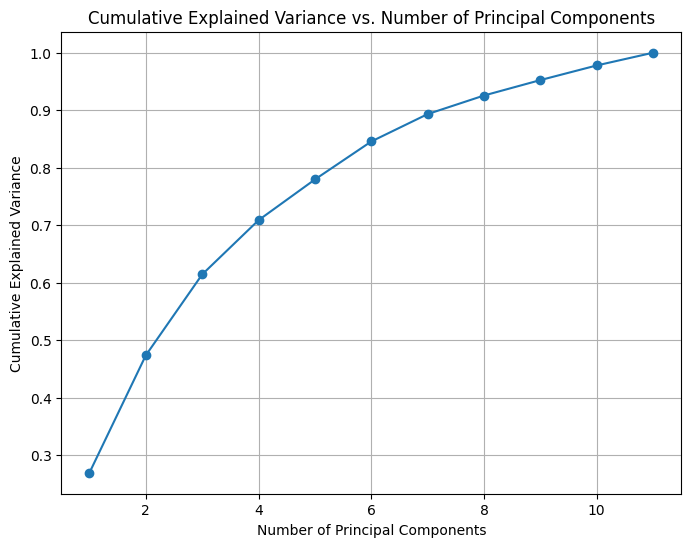

In [16]:
from sklearn.decomposition import PCA


# Perform PCA with the number of features in the dataset
n_components = X.shape[1]
pca = PCA(n_components=n_components)
pca.fit(X)

# Get the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, n_components + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [17]:
len(cumulative_explained_variance)

11

In [18]:
print('Number of components: 11, Variability Coverage:', cumulative_explained_variance[10])
print('Number of components: 9, Variability Coverage:', cumulative_explained_variance[8])

Number of components: 11, Variability Coverage: 1.0
Number of components: 9, Variability Coverage: 0.9524099829902251


When we observe the graph, we understand that with 11 principal components, the explained variance is 99%. But we have already 12 features in total, lets reduce component number to 9 with explained variance is 95%. 

In [19]:
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X)
X_pca.shape

(899, 9)

In [20]:
svm_classifier = SVC(kernel='rbf')

n_splits = 3
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
accuracy_scores = cross_val_score(svm_classifier, X_pca, y, cv=stratified_kfold, scoring='accuracy')
mean_accuracy_2 = np.mean(accuracy_scores)

print("Mean Accuracy SVM:", mean_accuracy)

Mean Accuracy SVM: 0.8609550353028613


In [21]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=30)
accuracy_scores = cross_val_score(logisticRegr, X_pca, y, cv=stratified_kfold, scoring='accuracy')
mean_acc_log_2 = np.mean(accuracy_scores)
print("Mean Accuracy Logistic Regression:", mean_acc_log_2)

Mean Accuracy Logistic Regression: 0.854284652545522


In [22]:
from sklearn.tree import DecisionTreeClassifier

dectree_clf = DecisionTreeClassifier(random_state=0)
n_splits = 3
strat_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=10)
acc_scores = cross_val_score(dectree_clf, X_pca, y, cv=strat_kfold, scoring='accuracy')
mean_acc_dt_2 = np.mean(acc_scores)
print("Mean Accuracy Decision Tree:", mean_acc_dt_2)

Mean Accuracy Decision Tree: 0.778658491267187


In [23]:
print(f'Accuracy of SVM before PCA = {mean_accuracy}, After PCA = {mean_accuracy_2}')
print(f'Accuracy of Linear Regression before PCA = {mean_acc_log}, After PCA = {mean_acc_log_2}')
print(f'Accuracy of Decision Tree before PCA = {mean_acc_dt}, After PCA = {mean_acc_dt_2}')

Accuracy of SVM before PCA = 0.8609550353028613, After PCA = 0.8576179858788554
Accuracy of Linear Regression before PCA = 0.8587328130806392, After PCA = 0.854284652545522
Accuracy of Decision Tree before PCA = 0.8020364176885916, After PCA = 0.778658491267187


Overall, reducing dataset to 9 principal components does not improve the accuracy results, conversely, it slightly decreased accuracy in SVM and Linear Regression models. In Decision Tree model, accuracy decreased most. Because we covered only 95% of the variance by applying PCA. Decision Trees are more sensitive to variance, they tend to overfit more. 